# College Basketball Data Analysis

Doug Beick | Udacity Data Scientist Nanodegree\
April, 2021

The goal in this project is to take data from multiple seasons of college basketball to assess team and conference performance, both in season and postseason.

---
## 1_understand_explore

## Business Understanding

We can assess performance in sports at the most basic level by looking at wins and losses. In collegiate basketball, there are two main periods of performance, wherein teams want to accumulate wins: the regular season, predominantly in  conference play, and the postseason, in a single-elimination championship tournament. Teams compete in the regular season for bragging rights and conference championships, as well as for a better performance record, which leads to favorable seeding in the postseason tournament.  
I want to explore which teams are best poised for success. Since the bulk of the regular season is played in conference, it's worth investigating if there is a natural advantage to being in one conference versus another when the postseason tournament rolls around. Put another way, does a team's conference affiliation have any more effect on their postseason seed than that team's in-game performance, on offense and on defense? We can break down this investigation into three main parts:
1. Analyze for differences between conferences in average in-game metrics. Which conferences produce the best offenses and the best defenses?
2. Analysis of in-game performance in general. Is a team with a better offense or a better defense more likely to have the most wins at the end of the season, including after the postseason tournament?
3. Analysis of how conference affiliation relates to seeding in general. Is there evidence of bias in favor of certain conferences, particularly the "Major" conferences, in the seeding of the postseason tournament?

## Data Understanding

I found a [collection of data sets on Kaggle](https://www.kaggle.com/andrewsundberg/college-basketball-dataset) which appear applicable to this project. Following is initial exploration of the data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df_13 = pd.read_csv('datasets/cbb13.csv')
# Add YEAR column to keep track of original data source
df_13['YEAR'] = '2013'
df_13.dtypes

TEAM           object
CONF           object
G               int64
W               int64
ADJOE         float64
ADJDE         float64
BARTHAG       float64
EFG_O         float64
EFG_D         float64
TOR           float64
TORD          float64
ORB           float64
DRB           float64
FTR           float64
FTRD          float64
2P_O          float64
2P_D          float64
3P_O          float64
3P_D          float64
ADJ_T         float64
WAB           float64
POSTSEASON     object
SEED          float64
YEAR           object
dtype: object

In [9]:
print('SHAPE:', df_13.shape)
df_13.head()

SHAPE: (347, 24)


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,Indiana,B10,36,29,121.0,89.7,0.9692,54.7,44.0,19.3,...,27.0,52.0,43.2,40.3,30.4,67.8,7.8,S16,1.0,2013
1,Gonzaga,WCC,34,31,118.9,90.2,0.9599,54.9,44.9,17.2,...,29.9,55.0,42.1,36.5,32.9,65.1,7.6,R32,1.0,2013
2,Kansas,B12,37,31,111.6,86.2,0.9514,53.3,41.5,20.3,...,32.0,52.9,39.3,36.4,30.3,67.7,7.5,S16,1.0,2013
3,Louisville,BE,40,35,115.9,84.5,0.9743,50.6,44.8,18.3,...,34.9,50.8,43.4,33.3,31.8,67.1,9.0,Champions,1.0,2013
4,Georgetown,BE,32,25,107.6,85.0,0.9381,51.1,43.0,20.1,...,35.3,50.2,41.4,35.3,30.7,62.5,6.6,R64,2.0,2013


In [10]:
# Make sure all data sets have the same columns and types
df_list = []
for i in range(3,10):
    df_cur = pd.read_csv('datasets/cbb1{0}.csv'.format(i))
    df_cur['YEAR'] = '201{0}'.format(i)
    df_list.append(df_cur)

# Use df_13 as baseline. If there are no differences among the data,
##  then all dtypes are equivalent and val remains True

val = True
for df in df_list:
    if df_13.dtypes.all() != df.dtypes.all():
        val = False
print(val)

True


In [11]:
# Build a large data set to look at aggregates

df_all = pd.concat(df_list)

print('SHAPE:', df_all.shape)
df_all.head()

SHAPE: (2455, 24)


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,Indiana,B10,36,29,121.0,89.7,0.9692,54.7,44.0,19.3,...,27.0,52.0,43.2,40.3,30.4,67.8,7.8,S16,1.0,2013
1,Gonzaga,WCC,34,31,118.9,90.2,0.9599,54.9,44.9,17.2,...,29.9,55.0,42.1,36.5,32.9,65.1,7.6,R32,1.0,2013
2,Kansas,B12,37,31,111.6,86.2,0.9514,53.3,41.5,20.3,...,32.0,52.9,39.3,36.4,30.3,67.7,7.5,S16,1.0,2013
3,Louisville,BE,40,35,115.9,84.5,0.9743,50.6,44.8,18.3,...,34.9,50.8,43.4,33.3,31.8,67.1,9.0,Champions,1.0,2013
4,Georgetown,BE,32,25,107.6,85.0,0.9381,51.1,43.0,20.1,...,35.3,50.2,41.4,35.3,30.7,62.5,6.6,R64,2.0,2013


### Look at columns that relate to our questions

NULLS: 0
MIN: 76.6
MAX: 129.1


<AxesSubplot:>

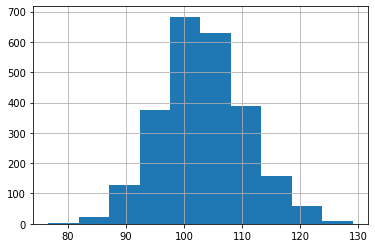

In [12]:
# Offensive Efficiency characteristics
joe = df_all['ADJOE']
print('NULLS:', joe.isna().sum())
print("MIN:", joe.min())
print("MAX:", joe.max())
joe.hist()

NULLS: 0
MIN: 84.0
MAX: 124.0


<AxesSubplot:>

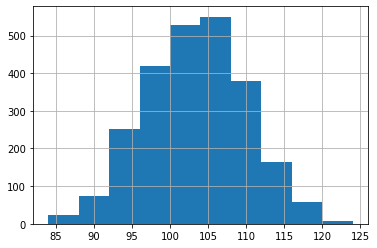

In [13]:
# Defensive Efficiency characteristics
jde = df_all['ADJDE']
print('NULLS:', jde.isna().sum())
print("MIN:", jde.min())
print("MAX:", jde.max())
jde.hist()

NULLS: 0
MIN: 15
MAX: 40


<AxesSubplot:>

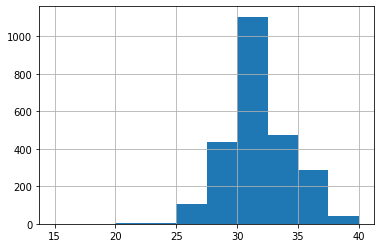

In [14]:
# Games characteristics
games = df_all['G']
print('NULLS:', games.isna().sum())
print("MIN:", games.min())
print("MAX:", games.max())
games.hist()

NULLS: 0
MIN: 0
MAX: 38


<AxesSubplot:>

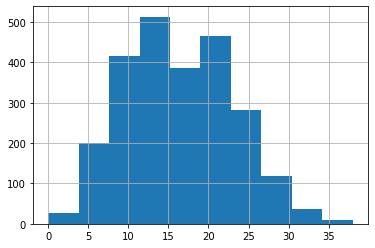

In [15]:
# Wins characteristics
wins = df_all['W']
print('NULLS:', wins.isna().sum())
print("MIN:", wins.min())
print("MAX:", wins.max())
wins.hist()

A bimodal distribution in the Wins column! Interesting. I would be curious to look into this more another time

In [16]:
# Postseason characteristics

ps = df_all['POSTSEASON']
print('NULLS:', ps.isna().sum())
print('VALS:', len(ps)-ps.isna().sum())

ps.value_counts()

NULLS: 1979
VALS: 476


R64          224
R32          112
S16           56
E8            28
R68           28
F4            14
2ND            7
Champions      7
Name: POSTSEASON, dtype: int64

In [17]:
# Seed characteristics

seed = df_all['SEED']
print('NULLS:', seed.isna().sum())
print('VALS:', len(seed)-seed.isna().sum())

seed.value_counts()

NULLS: 1979
VALS: 476


16.0    42
11.0    41
12.0    29
13.0    29
3.0     29
15.0    28
6.0     28
2.0     28
5.0     28
1.0     28
10.0    28
8.0     28
7.0     28
14.0    28
9.0     27
4.0     27
Name: SEED, dtype: int64

#### Errors in data

Due to quirks in the seeding of the NCAA tournament, not every seed appears an equal number of times over the year.
Based on which seeds were featured in the "First Four" play-in games, the cumulative counts should be:  
16 - 42  
11 - 40  
12 - 29  
13 - 29  
all else - 28  
This means we have mislabelings related to seeds 3, 4, 9, and 11. I look into this below, using a function to quickly run through the data based on these expected counts.

In [18]:
def find_mislabeled_years(counts_dict, df):
    '''
    INPUT:
    counts_dict - dictionary of dictionaries, where keys are years and values are dictionaries with:
                    keys as a seed and value is how many teams in that year should have that seed
    df - dataframe of college basketball data
    
    OUTPUT:
    new df - subset of original dataframe showing just the candidates for mislabeling, with only team and year cols.
    '''
    new_df = pd.DataFrame()
    for year in counts_dict:
        for seed in counts_dict[year]:
            seeded_df = df.loc[df['SEED'] == seed]
            if len(seeded_df[seeded_df['YEAR']==year]) != counts_dict[year][seed]:
                new_df = new_df.append(seeded_df.loc[seeded_df['YEAR']==year])[['TEAM', 'SEED', 'YEAR']]

    return new_df

In [19]:
year_seed_count_dict = {'2013': {3:4, 4:4, 9:4, 11:5, 12: 4, 13: 5},
                        '2014': {3:4, 4:4, 9:4, 11:5, 12: 5, 13: 4},
                        '2015': {3:4, 4:4, 9:4, 11:6, 12: 4, 13: 4},
                        '2016': {3:4, 4:4, 9:4, 11:6, 12: 4, 13: 4},
                        '2017': {3:4, 4:4, 9:4, 11:6, 12: 4, 13: 4},
                        '2018': {3:4, 4:4, 9:4, 11:6, 12: 4, 13: 4},
                        '2019': {3:4, 4:4, 9:4, 11:6, 12: 4, 13: 4}}
print(find_mislabeled_years(year_seed_count_dict,df_all).sort_values(by=['YEAR', 'SEED']))

                  TEAM  SEED  YEAR
32          Kansas St.   9.0  2014
33        Oklahoma St.   9.0  2014
34          Pittsburgh   9.0  2014
39              Dayton  11.0  2014
40   George Washington  11.0  2014
41                Iowa  11.0  2014
42            Nebraska  11.0  2014
43          Providence  11.0  2014
44           Tennessee  11.0  2014
125           Iowa St.   3.0  2016
165           Miami FL   3.0  2016
289          Texas A&M   3.0  2016
318               Utah   3.0  2016
336      West Virginia   3.0  2016
39          California   4.0  2016
72                Duke   4.0  2016
136           Kentucky   4.0  2016


##### Result of investigation

The above finding helps us save significant time searching for the mislabeled teams. Indeed, we can quickly look online for tournament brackets from 2014 and 2016 to discover that:  
In 2014, George Washington should be a 9 seed  
In 2016, Iowa State should be a 4 seed  

We will correct these when we clean the data in the next section.

In [20]:
# Conference characteristics

cf = df_all['CONF']
print('NULLS:', cf.isna().sum())
print('VALS:', len(cf)-cf.isna().sum())

print(sorted(cf.unique()))

NULLS: 0
VALS: 2455
['A10', 'ACC', 'AE', 'ASun', 'Amer', 'B10', 'B12', 'BE', 'BSky', 'BSth', 'BW', 'CAA', 'CUSA', 'GWC', 'Horz', 'Ind', 'Ivy', 'MAAC', 'MAC', 'MEAC', 'MVC', 'MWC', 'NEC', 'OVC', 'P12', 'Pat', 'SB', 'SC', 'SEC', 'SWAC', 'Slnd', 'Sum', 'WAC', 'WCC', 'ind']


#### Possible errors in data
All teams have an assigned conferences, which is good. However, there are similar labels 'Ind' and 'ind'. Let's look into it